# Regresión polinomial


La regresión *lineal* polinómica es una caso especial de regresión lineal simple. Su expresión matemática es la siguiente:

$$
y = b_{0} + b_{1}x_{1} + b_{2}x_{1}^{2} + ... + b_{n}x_{1}^{n}
$$

El hecho de que se siga llamando *lineal* cuando las variables son claramente no-lineales es debido a que no nos fijamos en dichas variables sino en los coeficientes que acompañan a dichas variables. Estos coeficientes son las incognitas que queremos averiguar y estos son lineales respecto a la *salida* o variable *y*.



Vamos a crear un *dataset* sintético que nos sirva como base para aplicar la teoría anterior.

Para que el ajuste no sea perfecto vamos a añadir a nuestros datos sintéticos un poco de ruido.

## Importando bibliotecas

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()
np.random.seed(42)

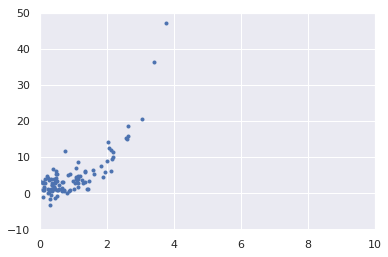

In [2]:
X = 1.387 * np.random.randn(200)
res = 2.4 * np.random.randn(200)
y = res + 1.13 * np.exp(X)
plt.plot(X, y,
         marker='.', linestyle='none')
plt.xlim([0,10])
plt.show()

Una vez generados los datos sintéticos vamos a continuar realizando, tanto una regresión lineal simple como una regresión lineal **polinómica** y veamos las diferencias entre ellas.

Previamente vamos a separar el *dataset* en conjunto de *entrenamiento* y en conjunto de *testing*

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Regresión lineal simple

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Reshape the data
"""X_train = np.reshape(a=X_train, newshape=(-1, 1))
X_test = np.reshape(a=X_test, newshape=(-1, 1))
y_train = np.reshape(a=y_train, newshape=(-1, 1))
y_test = np.reshape(a=y_test, newshape=(-1, 1))

# fitting
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
"""

# Reshape the data
X = np.reshape(X, newshape=(-1,1))
y = np.reshape(y, newshape=(-1,1))

# fitting
regressor.fit(X, y)
y_pred = regressor.predict(X)

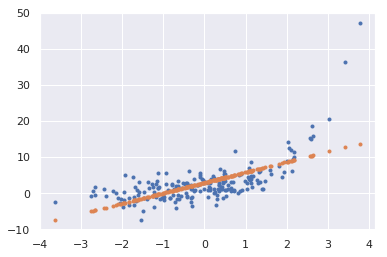

In [15]:
# Visualizando la predicción
plt.plot(X, y, marker='.', linestyle='none')
plt.plot(X, y_pred, marker='.', linestyle='none')
plt.show()

## Regresión polinómica

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degrees = 2)

# fit
poly_reg.fit(X, y)